<a href="https://colab.research.google.com/github/rebeckakarras/projekt2/blob/main/FA_redwine_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv, Series, DataFrame
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pip install factor_analyzer

In [3]:
from factor_analyzer import FactorAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



Datahandling of the white wine data.

In [18]:
data_white = pd.read_csv('winequality-red(1).csv', delimiter=";")
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Normalizing the variables.

In [19]:
data_white_dropped = data_white.drop(columns=['quality'])
X = StandardScaler().fit_transform(data_white_dropped)


Representation of the factors in a heatmap

In [20]:
from pandas import read_csv, Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

Here starts the Factor analysis where the module statsmodels.multivariate.factor calculates the eigenvalues, communalities and rotation of the variables from the wine data set.

In [23]:
from statsmodels.multivariate.factor import Factor
mod_w = Factor(data_white_dropped, 3)
res_w = mod_w.fit()
res_w.rotate('quartimax')
communalities = res_w.communality
#With summary the eigenvalues, communality, pre-rotated and qurtimax rotated loadings will be displayed.
res_w.summary()




<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                            Factor analysis results
===============================================================================================================================================
                                            Eigenvalues                                                                                        
-----------------------------------------------------------------------------------------------------------------------------------------------
 fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density    pH   sulphates alcohol
-----------------------------------------------------------------------------------------------------------------------------------------------
        2.7528           1.5367      1.1140         0.4190    0.2687              0.1228               0.0637 -0.0696 -0.0772   -0.3166 -0.4107
-----------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                               
-----------------------------------------------------------------------------------------------------------------------------------------------
                                            Communality                                                                                        
-----------------------------------------------------------------------------------------------------------------------------------------------
  fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density   pH   sulphates alcohol
-----------------------------------------------------------------------------------------------------------------------------------------------
         0.7637           0.4061      0.8604         0.0993    0.0908              0.6058               0.7544  0.8208 0.4577    0.1437  0.4008
-----------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                               
-----------------------------------------------------------------------------------------------------------------------------------------------
                                         Pre-rotated loadings                                                                                  
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                     factor 0                                                 factor 1                                                 factor 2
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
fixed acidity                                                         -0.8577                                                  -0.1295                                                   0.1065
volatile acidity                                                       0.3624                                                   0.2335                                                   0.4693
citric acid                                                           -0.8290                                                  -0.1530                                                  -0.3869
residual sugar                                                        -0.1980                                              

Three factors can be described as sourness, roughness and viscosity. The black numbers is an inidication of values going at the right direction and has high correlation, whilst the white numbers are going the opposite direction and has less significant correlation.


What can be noticed in terms of the factors distribution that density, alcohol and chlorides are factored togheter which can describe the viscosity of the wine. Fixed acidity, pH, Citric acid, volatile acidity and sulphates describes the sourness of the wine. Lastly, total suflur dioxide, free sulfur dioxide and residual sugar may represent the roughness of the wine.

In [22]:
# Here the factord will be displayed.
res_w.get_loadings_frame(threshold=0.5)

,factor 0,factor 1,factor 2
citric acid,-0.926798,0.028969,0.024422
fixed acidity,-0.737782,-0.167319,0.437489
pH,0.593720,-0.002028,-0.324361
volatile acidity,0.566464,0.004739,0.291855
sulphates,-0.369404,0.083796,-0.015284
total sulfur dioxide,0.019182,0.862538,0.100180
free sulfur dioxide,0.051141,0.774920,-0.052102
residual sugar,-0.129520,0.223685,0.180231
density,-0.351621,0.039880,0.834004
alcohol,-0.130552,-0.132142,-0.605221


The uniqueness is calculated in order to do the residual matrix. The uniqueness values should be ranging between 0 to 1, which is the case for each value. The closer the uniqeness numbrer is to one, then the variable is not well explained by the factors, which would be the case for residual sugar, chlorides and chlorides.

In [24]:
# Uniqueness is equal to 1 – communality
uniqueness = np.diag(1 - communalities)  if communalities.ndim == 2 else (1 - communalities)
uniqueness_df = pd.DataFrame(uniqueness, index=data_white_dropped.columns, columns=['Uniqueness'])
print(uniqueness_df)
lambda_ = res_w.loadings
s = np.corrcoef(np.transpose(data_white_dropped))

sigma = np.matmul(lambda_, lambda_.T) + np.diag(uniqueness)
residuals = s - sigma

                      Uniqueness
fixed acidity           0.236286
volatile acidity        0.593916
citric acid             0.139611
residual sugar          0.900706
chlorides               0.909174
free sulfur dioxide     0.394169
total sulfur dioxide    0.245625
density                 0.179209
pH                      0.542282
sulphates               0.856286
alcohol                 0.599202


The residual matrix show the goodness of fit of the linear regression model. If the residual matrix show that the residual has small and uncorrelated values, is an inidcation of the model being a good fit for the data. Overall the values in the Residual matrix are of small values, hence an indication of a goodness of fit. Even though some of the values are significant larger than the rest has to do with the uniqueness values.

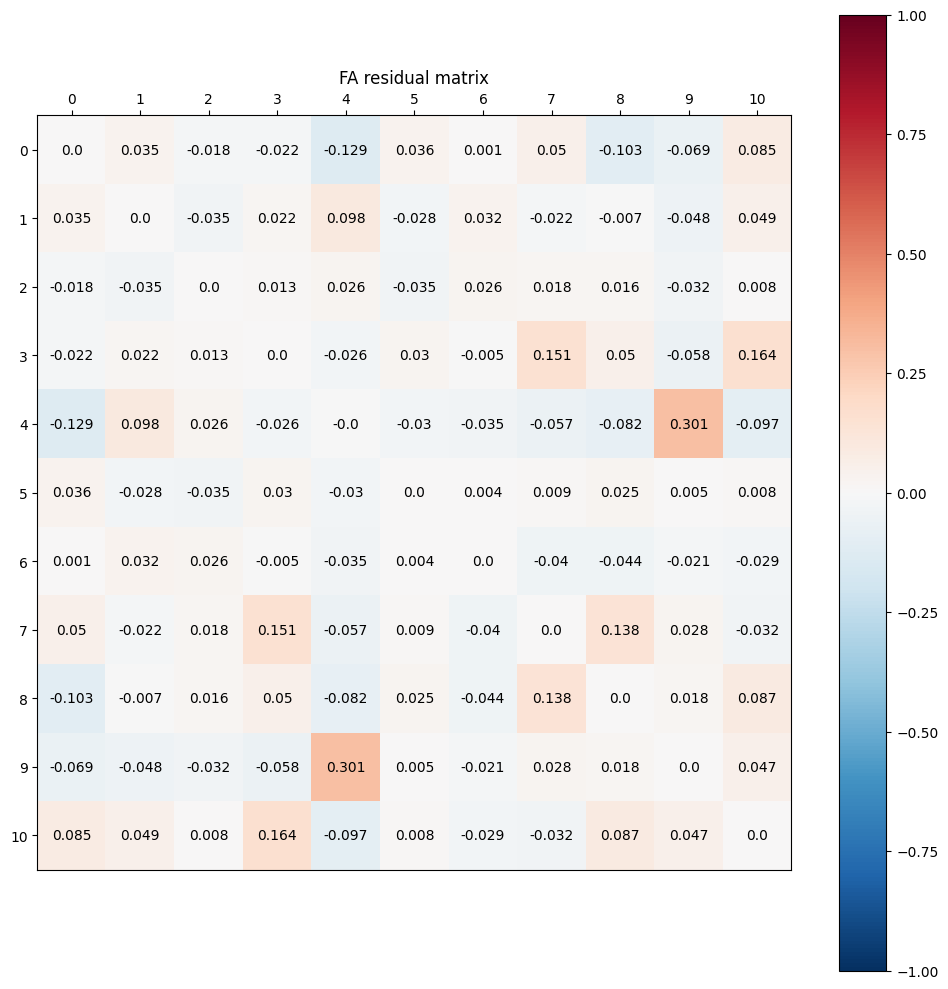

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(11))
ax.set_yticks(range(11))
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

plt.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

An overview of the factors in a heatmap for easier understanding of the correlation between the variables in the factors.

<Axes: >

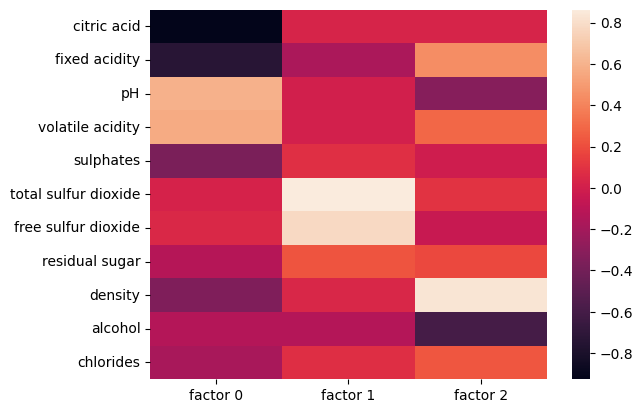

In [26]:
heatmap_w = res_w.get_loadings_frame(threshold=0.5).data
sns.heatmap(heatmap_w)

Using a diagram to plot each of the factors against each other to see if there is any correlation between the variables. Intrestingly, none of the variables seems to have zero impact when comparing all of the factors, hence no values should be dropped. However, by looking at the uniqeness numbers, one should consider dropping, residuals sugar, chlorides and sulphates. Since the uniqeness values suggest that they probably not contribute to the factor distribution, which was presented eariler in the script.



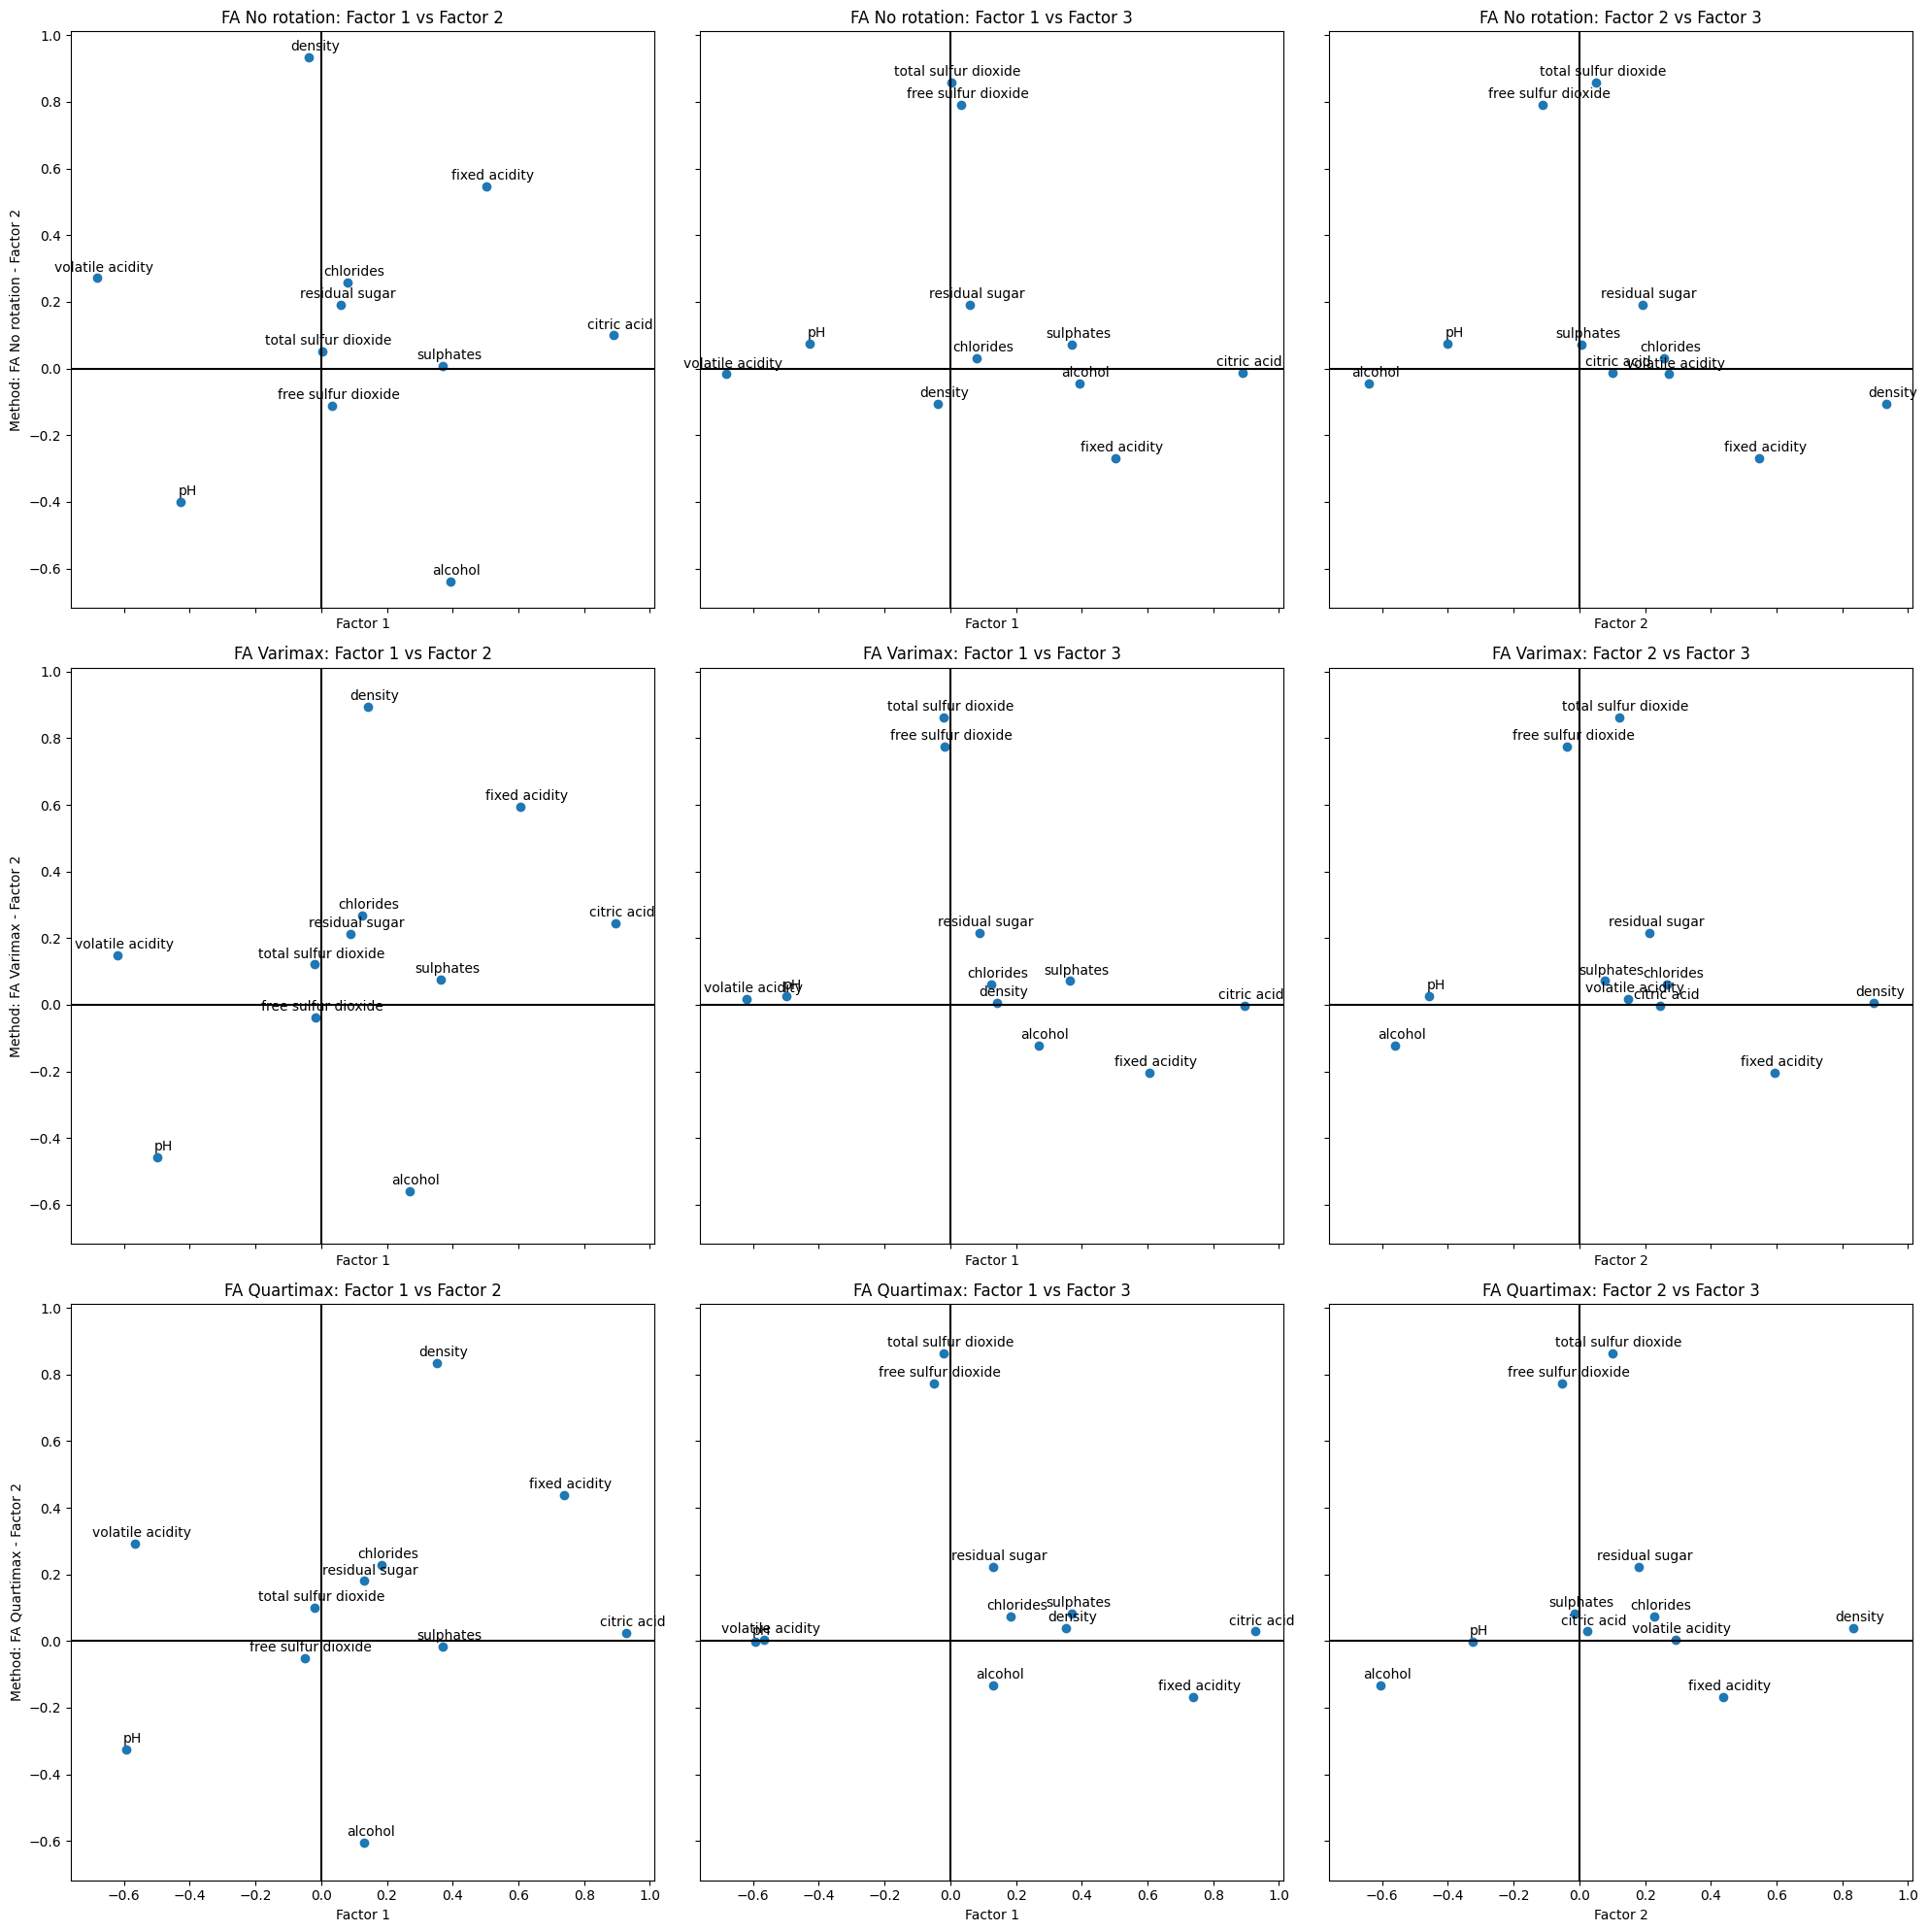

In [27]:
methods = [
    ("FA No rotation", FactorAnalyzer(3)),
    ("FA Varimax", FactorAnalyzer(3, rotation="varimax")),
    ("FA Quartimax", FactorAnalyzer(3, rotation="quartimax")),
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=True, sharey=True)

for row, (method_name, fa) in enumerate(methods):
    # Fit the FactorAnalyzer model
    fa.fit(data_white_dropped)

    # Get the factor loadings
    loadings = fa.loadings_

    # Plot Factor 1 vs Factor 2
    ax = axes[row, 0]
    ax.scatter(loadings[:, 0], loadings[:, 1])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_title(f"{method_name}: Factor 1 vs Factor 2")
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(f"Method: {method_name} - Factor 2")
    ax.set_xlabel("Factor 1")
    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        ax.text(x + 0.02, y + 0.02, data_white.columns[i], ha="center")

    # Plot Factor 1 vs Factor 3
    ax = axes[row, 1]
    ax.scatter(loadings[:, 0], loadings[:, 2])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_title(f"{method_name}: Factor 1 vs Factor 3")
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(f"Method: {method_name} - Factor 3")
    ax.set_xlabel("Factor 1")
    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 2])):
        ax.text(x + 0.02, y + 0.02, data_white.columns[i], ha="center")

    # Plot Factor 2 vs Factor 3
    ax = axes[row, 2]
    ax.scatter(loadings[:, 1], loadings[:, 2])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_title(f"{method_name}: Factor 2 vs Factor 3")
    ax.set_xlabel("Factor 2")
    for i, (x, y) in enumerate(zip(loadings[:, 1], loadings[:, 2])):
        ax.text(x + 0.02, y + 0.02, data_white.columns[i], ha="center")
plt.tight_layout()

# Show the plot
plt.show()

The threshold value indicates that residual sugar, chlorides and sulphates should be negecleted when considering the factors but not dropped since there data is still valuable to understand the overall quality.

